In [1]:
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('owid-covid-data.csv')

In [3]:
# Preview columns
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
# Preview top rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
# Checking missing values
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [9]:
# Cleaning data
# Keep only Kenya, USA, and India
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Convert date
df['date'] = pd.to_datetime(df['date'])

# Handle missing values
df = df.fillna(0)  # or use interpolate()

In [10]:
#exploratory Data Analysis

import matplotlib.pyplot as plt

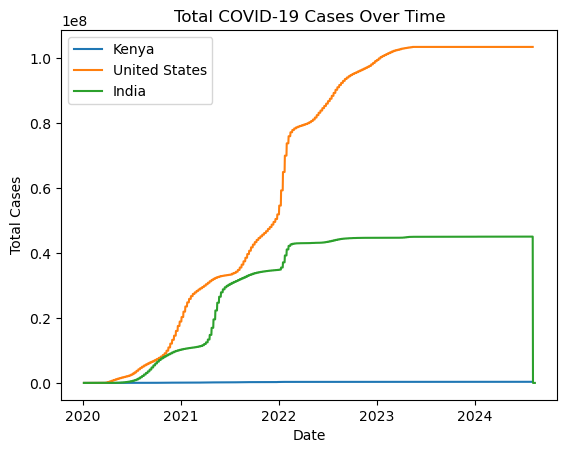

In [11]:
# Total cases over time for selected countries
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Total COVID-19 Cases Over Time")
plt.legend()
plt.show()

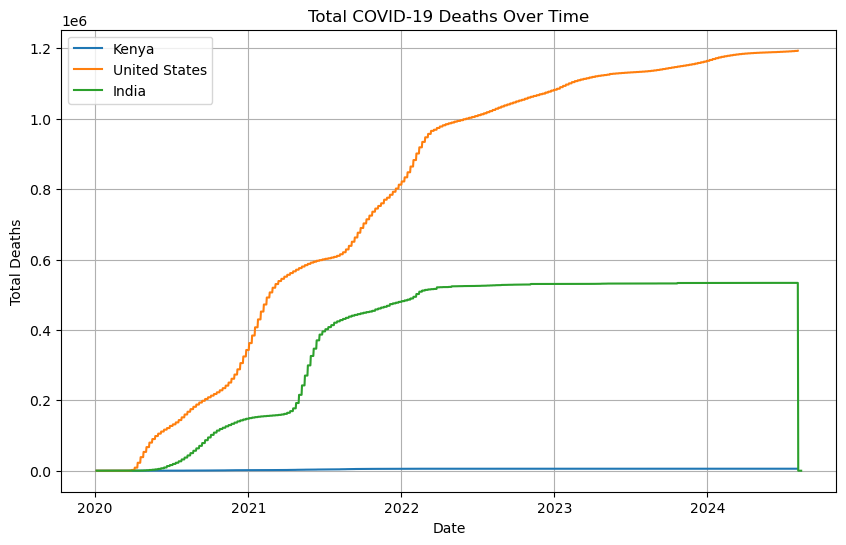

In [12]:
# Total Deaths Over Time

plt.figure(figsize=(10, 6))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.title("Total COVID-19 Deaths Over Time")
plt.legend()
plt.grid(True)
plt.show()

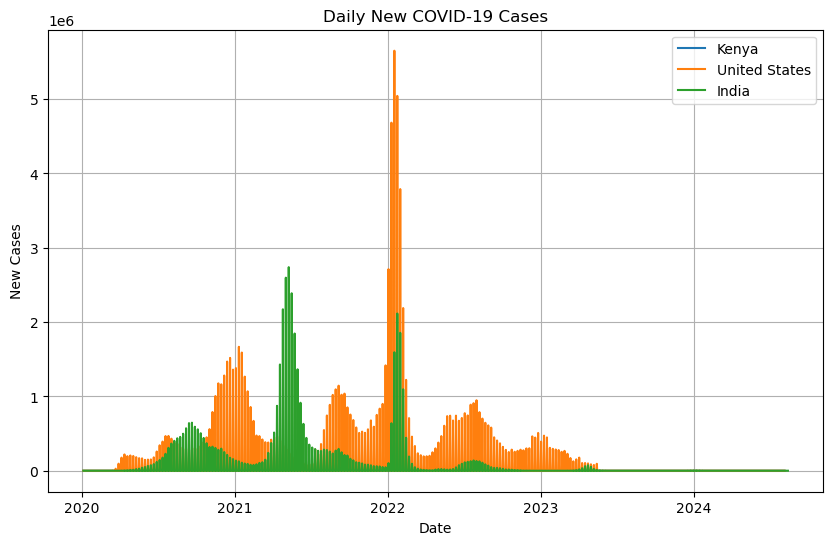

In [13]:
#New Daily Cases

plt.figure(figsize=(10, 6))

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Daily New COVID-19 Cases")
plt.legend()
plt.grid(True)
plt.show()

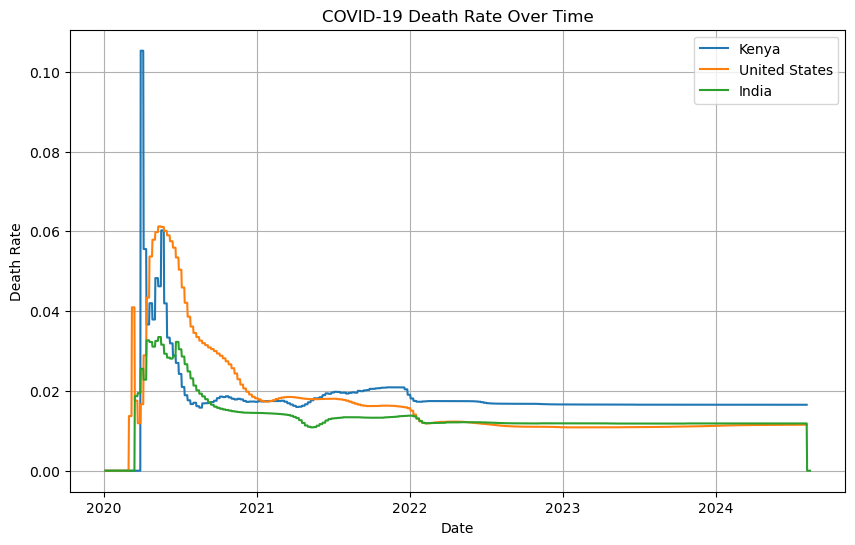

In [14]:
#Death Rate (Deaths ÷ Cases)

plt.figure(figsize=(10, 6))

for country in countries:
    country_data = df[df['location'] == country].copy()
    
    # Avoid division by zero
    country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases']
    country_data['death_rate'].replace([float('inf'), -float('inf')], 0, inplace=True)
    country_data['death_rate'].fillna(0, inplace=True)

    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.title("COVID-19 Death Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()

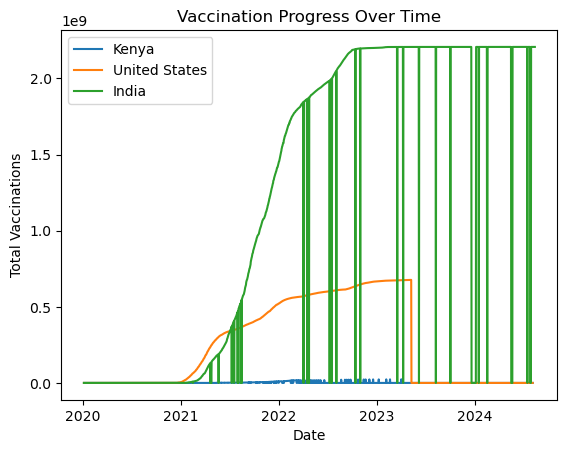

In [15]:
# Vaccination progress
# Plot total vaccinations

for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Vaccination Progress Over Time")
plt.legend()
plt.show()

